# **Assignment Week 2 - Network Analysis**

For this assingment you will be working with Game of Thrones co-ocurrence network. The assignment is divided into three parts: Networks descriptive analyses, centrality measures, and community detection. 

**Importing the libraries**

In [164]:
import networkx as nx
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

#### You can add below any additional library you want to use
df = nx.to_pandas_adjacency(nx.florentine_families_graph())
G = nx.from_pandas_adjacency(df)

df = nx.to_pandas_edgelist(nx.krackhardt_kite_graph())
G = nx.from_pandas_edgelist(df)

df = nx.to_numpy_array(nx.petersen_graph())
G = nx.from_numpy_array(df)


**Read the files:** *book1.csv*, *book2.csv*, *book3.csv*, *book4.csv*, *book5.csv*  in Week2/sample files/

In [165]:
#Reading files
Got_book1 = pd.read_csv('Week 2\\book1.csv')
Got_book2 = pd.read_csv('Week 2\\book2.csv')
Got_book3 = pd.read_csv('Week 2\\book3.csv')
Got_book4 = pd.read_csv('Week 2\\book4.csv')
Got_book5 = pd.read_csv('Week 2\\book5.csv')


**Create five undirected weighted networks:** Create one network per book naming them got_1, got_2, got_3, got_4, and got_5. 

In [166]:
# Create your networks
# Creating the network as an undirected graph
GoT_1 = nx.Graph()
for _, edge in Got_book1.iterrows(): #Manually adding the edges to the network
    GoT_1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

GoT_2 = nx.Graph()
for _, edge in Got_book2.iterrows(): #Manually adding the edges to the network
    GoT_2.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

GoT_3 = nx.Graph()
for _, edge in Got_book3.iterrows(): #Manually adding the edges to the network
    GoT_3.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

GoT_4 = nx.Graph()
for _, edge in Got_book4.iterrows(): #Manually adding the edges to the network
    GoT_4.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

GoT_5 = nx.Graph()
for _, edge in Got_book5.iterrows(): #Manually adding the edges to the network
    GoT_5.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])



#### **Part 1: Game of thrones' networks descriptive analyses**

Inspect and compare the networks you have created. Which one is the biggest network? why? 

In [167]:
# Your code
print('Book 1 Network density: ', nx.density(G= GoT_1))

print('Book 2 Network density: ', nx.density(G= GoT_2))

print('Book 3 Network density: ', nx.density(G= GoT_3))

print('Book 4 Network density: ', nx.density(G= GoT_4))

print('Book 5 Network density: ', nx.density(G= GoT_5))

Book 1 Network density:  0.03933068828704502
Book 2 Network density:  0.02319595342851157
Book 3 Network density:  0.02203134220706839
Book 4 Network density:  0.01823480655597444
Book 5 Network density:  0.015173900890468394


Network density measures how connected the network is compared to the maximum possible number of connections.
High Density, close to 1 = interconnected network where nodes are directly connected.
Low density, close to 0 = sparse network with few connections.
In this case Book 1 has the higher density and Book5 the lowest.

In [169]:
print('Number of nodes in GoT_1: ', GoT_1.number_of_nodes(),' Number of edges in GoT_1: ', GoT_1.number_of_edges(), ' Sum of Weights (Size): ' ,GoT_1.size(weight='weight'))
print('Number of nodes in GoT_2: ', GoT_2.number_of_nodes(),' Number of edges in GoT_2: ', GoT_2.number_of_edges(), ' Sum of Weights (Size): ' ,GoT_2.size(weight='weight'))
print('Number of nodes in GoT_3: ', GoT_3.number_of_nodes(),' Number of edges in GoT_3: ', GoT_3.number_of_edges(), ' Sum of Weights (Size): ' ,GoT_3.size(weight='weight'))
print('Number of nodes in GoT_4: ', GoT_4.number_of_nodes(),' Number of edges in GoT_4: ', GoT_4.number_of_edges(), ' Sum of Weights (Size): ' ,GoT_4.size(weight='weight'))
print('Number of nodes in GoT_5: ', GoT_5.number_of_nodes(),' Number of edges in GoT_5: ', GoT_5.number_of_edges(), ' Sum of Weights (Size): ' ,GoT_5.size(weight='weight'))


Number of nodes in GoT_1:  187  Number of edges in GoT_1:  684  Sum of Weights (Size):  7366.0
Number of nodes in GoT_2:  259  Number of edges in GoT_2:  775  Sum of Weights (Size):  6360.0
Number of nodes in GoT_3:  303  Number of edges in GoT_3:  1008  Sum of Weights (Size):  8477.0
Number of nodes in GoT_4:  274  Number of edges in GoT_4:  682  Sum of Weights (Size):  4717.0
Number of nodes in GoT_5:  317  Number of edges in GoT_5:  760  Sum of Weights (Size):  5709.0


#Your answer 

In which of the five books are the characters better connected? why?

Number of Nodes (Largest Network): Book 5 has the most nodes (317), meaning it includes the most characters.
Number of Edges (Most Connected): Book 3 has the most edges (1008), meaning it has the highest number of interactions between characters.
Sum of Weights (Strongest Interactions): Book 3 also has the highest sum of weights (8477.0), indicating the most intense or frequent interactions overall.

If we talk about more frequent interactions then book 3 is better connected, 8477 of weight (stronger connections) and 1008 as number of edges (number of interactions).
If we talk about better connections, then book 1 has the highest density 0.0393 meaning the characters are tightly connected.




#### **Part 2: Centrality measures**

Which characters are the most influential in each book? why?

In [170]:
#Your code
GoT_centralities1 = pd.DataFrame.from_dict(dict(nx.degree(GoT_1)), orient='index')
GoT_centralities1.columns = ['Degree']
GoT_centralities1['Weighted Degree'] = pd.DataFrame.from_dict(dict(nx.degree(GoT_1, weight='weight')), orient='index')
GoT_centralities1['Betweenness'] = pd.DataFrame.from_dict(dict(nx.betweenness_centrality(GoT_1,normalized=False)), orient='index')  #We should use betweenness with weights when they represent length. 
GoT_centralities1['Closeness'] = pd.DataFrame.from_dict(dict(nx.closeness_centrality(GoT_1, distance='weight')), orient='index')
GoT_centralities1['Page Rank'] = pd.DataFrame.from_dict(dict(nx.pagerank(GoT_1, weight='weight')), orient='index') #Page rank should be used for directed networks. If your network is undirected it will be converted to a directed oned 
GoT_centralities1['Eigenvector'] = pd.DataFrame.from_dict(dict(nx.eigenvector_centrality(GoT_1, weight='weight')), orient='index')



GoT_centralities2 = pd.DataFrame.from_dict(dict(nx.degree(GoT_2)), orient='index')
GoT_centralities2.columns = ['Degree']
GoT_centralities2['Weighted Degree'] = pd.DataFrame.from_dict(dict(nx.degree(GoT_2, weight='weight')), orient='index')
GoT_centralities2['Betweenness'] = pd.DataFrame.from_dict(dict(nx.betweenness_centrality(GoT_2,normalized=False)), orient='index')  #We should use betweenness with weights when they represent length. 
GoT_centralities2['Closeness'] = pd.DataFrame.from_dict(dict(nx.closeness_centrality(GoT_2, distance='weight')), orient='index')
GoT_centralities2['Page Rank'] = pd.DataFrame.from_dict(dict(nx.pagerank(GoT_2, weight='weight')), orient='index') #Page rank should be used for directed networks. If your network is undirected it will be converted to a directed oned 
GoT_centralities2['Eigenvector'] = pd.DataFrame.from_dict(dict(nx.eigenvector_centrality(GoT_2, weight='weight')), orient='index')



GoT_centralities3 = pd.DataFrame.from_dict(dict(nx.degree(GoT_3)), orient='index')
GoT_centralities3.columns = ['Degree']
GoT_centralities3['Weighted Degree'] = pd.DataFrame.from_dict(dict(nx.degree(GoT_3, weight='weight')), orient='index')
GoT_centralities3['Betweenness'] = pd.DataFrame.from_dict(dict(nx.betweenness_centrality(GoT_3,normalized=False)), orient='index')  #We should use betweenness with weights when they represent length. 
GoT_centralities3['Closeness'] = pd.DataFrame.from_dict(dict(nx.closeness_centrality(GoT_3, distance='weight')), orient='index')
GoT_centralities3['Page Rank'] = pd.DataFrame.from_dict(dict(nx.pagerank(GoT_3, weight='weight')), orient='index') #Page rank should be used for directed networks. If your network is undirected it will be converted to a directed oned 
GoT_centralities3['Eigenvector'] = pd.DataFrame.from_dict(dict(nx.eigenvector_centrality(GoT_3, weight='weight')), orient='index')



GoT_centralities4 = pd.DataFrame.from_dict(dict(nx.degree(GoT_4)), orient='index')
GoT_centralities4.columns = ['Degree']
GoT_centralities4['Weighted Degree'] = pd.DataFrame.from_dict(dict(nx.degree(GoT_4, weight='weight')), orient='index')
GoT_centralities4['Betweenness'] = pd.DataFrame.from_dict(dict(nx.betweenness_centrality(GoT_4,normalized=False)), orient='index')  #We should use betweenness with weights when they represent length. 
GoT_centralities4['Closeness'] = pd.DataFrame.from_dict(dict(nx.closeness_centrality(GoT_4, distance='weight')), orient='index')
GoT_centralities4['Page Rank'] = pd.DataFrame.from_dict(dict(nx.pagerank(GoT_4, weight='weight')), orient='index') #Page rank should be used for directed networks. If your network is undirected it will be converted to a directed oned 
GoT_centralities4['Eigenvector'] = pd.DataFrame.from_dict(dict(nx.eigenvector_centrality(GoT_4, weight='weight')), orient='index')



GoT_centralities5 = pd.DataFrame.from_dict(dict(nx.degree(GoT_5)), orient='index')
GoT_centralities5.columns = ['Degree']
GoT_centralities5['Weighted Degree'] = pd.DataFrame.from_dict(dict(nx.degree(GoT_5, weight='weight')), orient='index')
GoT_centralities5['Betweenness'] = pd.DataFrame.from_dict(dict(nx.betweenness_centrality(GoT_5,normalized=False)), orient='index')  #We should use betweenness with weights when they represent length. 
GoT_centralities5['Closeness'] = pd.DataFrame.from_dict(dict(nx.closeness_centrality(GoT_5, distance='weight')), orient='index')
GoT_centralities5['Page Rank'] = pd.DataFrame.from_dict(dict(nx.pagerank(GoT_5, weight='weight')), orient='index') #Page rank should be used for directed networks. If your network is undirected it will be converted to a directed oned 
GoT_centralities5['Eigenvector'] = pd.DataFrame.from_dict(dict(nx.eigenvector_centrality(GoT_5, weight='weight')), orient='index')



In [171]:
#Book 1
print(f"The character with highest weighted degree is: {max(GoT_1, key=GoT_1.degree(weight='weight'))}")
print(f"The character with highest closeness is: {max(GoT_1, key=nx.closeness_centrality(GoT_1,distance='weight').get)}")
print(f"The character with highest betweeness is: {max(GoT_1, key=nx.betweenness_centrality(GoT_1).get)}") #We should use betweenness with weights when they represent length. 
print(f"The character with highest page rank is: {max(GoT_1, key=nx.pagerank(GoT_1,weight='weight').get)}") #Page rank should be used for directed networks. If your network is undirected it will be converted to a directed oned 
print(f"The character with highest eigenvector is: {max(GoT_1, key=nx.eigenvector_centrality(GoT_1,weight='weight').get)}")

The character with highest weighted degree is: Eddard-Stark
The character with highest closeness is: Robert-Baratheon
The character with highest betweeness is: Eddard-Stark
The character with highest page rank is: Eddard-Stark
The character with highest eigenvector is: Eddard-Stark


Eddard Stark with most weighted degree (most interactions with others), betweenness centrality (connecting different groups), *PageRank and Eigenvector (connected with influencial characters).
*As this is undirected network, it just reflects his central position)
He was hand of the king :) But killed for Joffrey :(

In [172]:
#Book 2
print(f"The character with highest weighted degree is: {max(GoT_2, key=GoT_2.degree(weight='weight'))}")
print(f"The character with highest closeness is: {max(GoT_2, key=nx.closeness_centrality(GoT_2,distance='weight').get)}")
print(f"The character with highest betweeness is: {max(GoT_2, key=nx.betweenness_centrality(GoT_2).get)}") #We should use betweenness with weights when they represent length. 
print(f"The character with highest page rank is: {max(GoT_2, key=nx.pagerank(GoT_2,weight='weight').get)}") #Page rank should be used for directed networks. If your network is undirected it will be converted to a directed oned 
print(f"The character with highest eigenvector is: {max(GoT_2, key=nx.eigenvector_centrality(GoT_2,weight='weight').get)}")

The character with highest weighted degree is: Tyrion-Lannister
The character with highest closeness is: Robert-Baratheon
The character with highest betweeness is: Arya-Stark
The character with highest page rank is: Tyrion-Lannister
The character with highest eigenvector is: Tyrion-Lannister


Tyrion Lannister with the most weighted degree (most interactions), *PageRank and Eigenvector (Connections with other influential characters).
*Same as Eddard, it only shows his central position without showing how his enfluence flows.
Hand of the King, savior of Kings Landing on Black waters Battle

In [173]:
#Book 3
print(f"The character with highest weighted degree is: {max(GoT_3, key=GoT_3.degree(weight='weight'))}")
print(f"The character with highest closeness is: {max(GoT_3, key=nx.closeness_centrality(GoT_3,distance='weight').get)}")
print(f"The character with highest betweeness is: {max(GoT_3, key=nx.betweenness_centrality(GoT_3).get)}") #We should use betweenness with weights when they represent length. 
print(f"The character with highest page rank is: {max(GoT_3, key=nx.pagerank(GoT_3,weight='weight').get)}") #Page rank should be used for directed networks. If your network is undirected it will be converted to a directed oned 
print(f"The character with highest eigenvector is: {max(GoT_3, key=nx.eigenvector_centrality(GoT_3,weight='weight').get)}")

The character with highest weighted degree is: Tyrion-Lannister
The character with highest closeness is: Joffrey-Baratheon
The character with highest betweeness is: Jon-Snow
The character with highest page rank is: Jon-Snow
The character with highest eigenvector is: Tyrion-Lannister


Despite Jon Snow got the highest *PageRank and Betweenness (acting like a bridge), Tyrion Lannister has the most weighted degree and eigenvector, making him the character with the most interactions with other influential characters.
*With a directed network, PageRank may point to another character due influence flow. 
RIP 

In [174]:
#Book 4
print(f"The character with highest weighted degree is: {max(GoT_4, key=GoT_4.degree(weight='weight'))}")
print(f"The character with highest closeness is: {max(GoT_4, key=nx.closeness_centrality(GoT_4,distance='weight').get)}")
print(f"The character with highest betweeness is: {max(GoT_4, key=nx.betweenness_centrality(GoT_4).get)}") #We should use betweenness with weights when they represent length. 
print(f"The character with highest page rank is: {max(GoT_4, key=nx.pagerank(GoT_4,weight='weight').get)}") #Page rank should be used for directed networks. If your network is undirected it will be converted to a directed oned 
print(f"The character with highest eigenvector is: {max(GoT_4, key=nx.eigenvector_centrality(GoT_4,weight='weight').get)}")

The character with highest weighted degree is: Jaime-Lannister
The character with highest closeness is: Tyrion-Lannister
The character with highest betweeness is: Stannis-Baratheon
The character with highest page rank is: Cersei-Lannister
The character with highest eigenvector is: Cersei-Lannister


In this book Cersei Lannister has the highest *PageRank and Eigenvector, giving her strong influence and connections with other key characters. Jamie Lannister has the most interactions (weighted degree) and Stannis Baratheon was the most important bridge (betweenness)
*Same case as Jon Snow

In [175]:
#Book 5
print(f"The character with highest weighted degree is: {max(GoT_5, key=GoT_5.degree(weight='weight'))}")
print(f"The character with highest closeness is: {max(GoT_5, key=nx.closeness_centrality(GoT_5,distance='weight').get)}")
print(f"The character with highest betweeness is: {max(GoT_5, key=nx.betweenness_centrality(GoT_5).get)}") #We should use betweenness with weights when they represent length. 
print(f"The character with highest page rank is: {max(GoT_5, key=nx.pagerank(GoT_5,weight='weight').get)}") #Page rank should be used for directed networks. If your network is undirected it will be converted to a directed oned 
print(f"The character with highest eigenvector is: {max(GoT_5, key=nx.eigenvector_centrality(GoT_5,weight='weight').get)}")

The character with highest weighted degree is: Jon-Snow
The character with highest closeness is: Stannis-Baratheon
The character with highest betweeness is: Stannis-Baratheon
The character with highest page rank is: Jon-Snow
The character with highest eigenvector is: Daenerys-Targaryen


Jon Snow is the most influential character having the highest weighted degree (most interactions) and *PageRank (connections with influential figures).
Stannis baratheon has high closseness and betweenness showing his role in binding different characters.


#Your answer

In [205]:
#print centralities
print(GoT_centralities1.head())

                    Degree  Weighted Degree  Betweenness  Closeness  \
Addam-Marbrand           2                9     0.000000   0.077371   
Jaime-Lannister         29              241   550.724381   0.099839   
Tywin-Lannister         22              181   450.607138   0.094368   
Aegon-I-Targaryen        2                9     0.000000   0.071566   
Daenerys-Targaryen      21              443  1484.278023   0.076105   

                    Page Rank  Eigenvector  
Addam-Marbrand       0.001276     0.001551  
Jaime-Lannister      0.014403     0.103790  
Tywin-Lannister      0.011424     0.068416  
Aegon-I-Targaryen    0.001254     0.005096  
Daenerys-Targaryen   0.027099     0.025726  


In [206]:
#Eddard Stark
character = 'Eddard-Stark'
centrality_measures = GoT_centralities1.loc[character]

print(f"Centrality measures for {character}:")
print(centrality_measures)

Centrality measures for Eddard-Stark:
Degree               66.000000
Weighted Degree    1284.000000
Betweenness        4638.534951
Closeness             0.097229
Page Rank             0.072362
Eigenvector           0.560718
Name: Eddard-Stark, dtype: float64


In [207]:
#Compare
characters = ['Eddard-Stark', 'Jon-Snow']
centrality_comparison = GoT_centralities1.loc[characters]

print(centrality_comparison)

              Degree  Weighted Degree  Betweenness  Closeness  Page Rank  \
Eddard-Stark      66             1284  4638.534951   0.097229   0.072362   
Jon-Snow          37              784  2952.057282   0.084277   0.047708   

              Eigenvector  
Eddard-Stark     0.560718  
Jon-Snow         0.166858  


In [208]:
#extract centrality from one character
def get_character_centrality_across_books(character, centralities_by_book):results = []

In [209]:
def get_character_centrality_across_books(character, centralities_by_book):
    """
    Extract centrality measures for a specific character across all books.
    
    Parameters:
        character (str): The name of the character to extract.
        centralities_by_book (dict): A dictionary where keys are book names 
                                     and values are centrality DataFrames.
    
    Returns:
        pd.DataFrame: Centrality measures for the character across books.
    """
    results = []
    
    for book, centrality_df in centralities_by_book.items():
        if character in centrality_df.index:
            centrality_measures = centrality_df.loc[character]
            centrality_measures['Book'] = book
            results.append(centrality_measures)
        else:
            print(f"Character {character} not found in {book}")
    
    return pd.DataFrame(results).set_index('Book')


In [210]:
# Combine centrality DataFrames for all books
centralities_by_book = {
    "Book 1": GoT_centralities1,
    "Book 2": GoT_centralities2,
    "Book 3": GoT_centralities3,
    "Book 4": GoT_centralities4,
    "Book 5": GoT_centralities5
}


In [211]:
character = "Jon-Snow"
character_centralities = get_character_centrality_across_books(character, centralities_by_book)

print(f"Centrality measures for {character} across books:")
print(character_centralities)



Centrality measures for Jon-Snow across books:
        Degree  Weighted Degree   Betweenness  Closeness  Page Rank  \
Book                                                                  
Book 1    37.0            784.0   2952.057282   0.084277   0.047708   
Book 2    28.0            360.0   5783.201673   0.084341   0.028401   
Book 3    52.0            756.0  10173.233957   0.083749   0.037954   
Book 4    11.0             96.0   2443.147449   0.076087   0.009401   
Book 5    62.0            761.0  12186.121627   0.073746   0.059572   

        Eigenvector  
Book                 
Book 1     0.166858  
Book 2     0.022123  
Book 3     0.060638  
Book 4     0.011704  
Book 5     0.003428  


C:\Users\lhdia\AppData\Local\Temp\ipykernel_4420\167915298.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centrality_measures['Book'] = book
C:\Users\lhdia\AppData\Local\Temp\ipykernel_4420\167915298.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centrality_measures['Book'] = book
C:\Users\lhdia\AppData\Local\Temp\ipykernel_4420\167915298.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centrality_measures['Book'] = boo

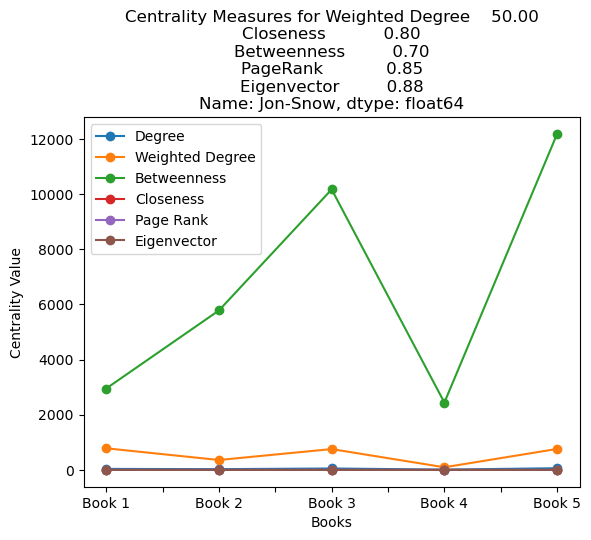

In [212]:
#Character centralities+plot
character_centralities.plot(kind='line', marker='o', title=f"Centrality Measures for {jon_snow_data}")
plt.ylabel("Centrality Value")
plt.xlabel("Books")
plt.legend(loc="best")
plt.show()

In [213]:
def compare_characters_across_books(characters, centralities_by_book):
    """
    Extract centrality measures for multiple characters across all books.
    
    Parameters:
        characters (list): List of character names to extract.
        centralities_by_book (dict): A dictionary where keys are book names 
                                     and values are centrality DataFrames.
    
    Returns:
        pd.DataFrame: Centrality measures for all characters across books.
    """
    results = []
    
    for book, centrality_df in centralities_by_book.items():
        for character in characters:
            if character in centrality_df.index:
                centrality_measures = centrality_df.loc[character]
                centrality_measures['Character'] = character
                centrality_measures['Book'] = book
                results.append(centrality_measures)
            else:
                print(f"Character {character} not found in {book}")
    
    return pd.DataFrame(results).set_index(['Book', 'Character'])


In [215]:
characters = ['Jon-Snow', 'Tyrion-Lannister', 'Joffrey-Baratheon', 'Cersei-Lannister']
comparison_df = compare_characters_across_books(characters, centralities_by_book)

#print(comparison_df)

C:\Users\lhdia\AppData\Local\Temp\ipykernel_4420\1515803166.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centrality_measures['Character'] = character
C:\Users\lhdia\AppData\Local\Temp\ipykernel_4420\1515803166.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centrality_measures['Character'] = character
C:\Users\lhdia\AppData\Local\Temp\ipykernel_4420\1515803166.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centrality

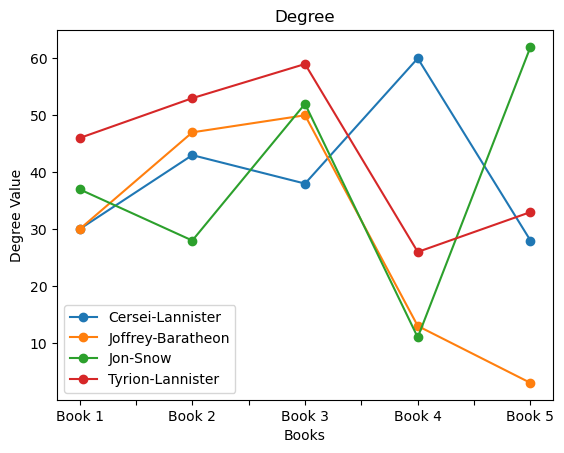

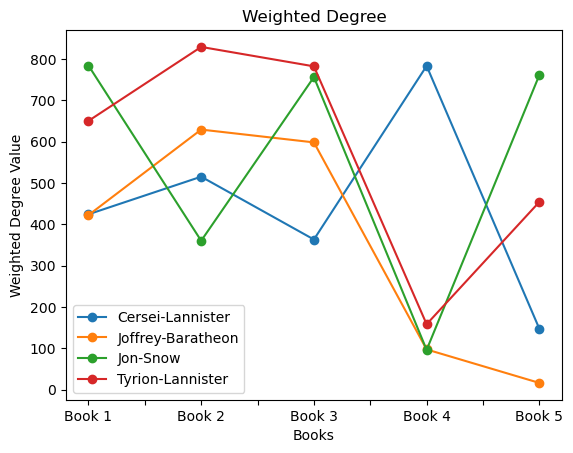

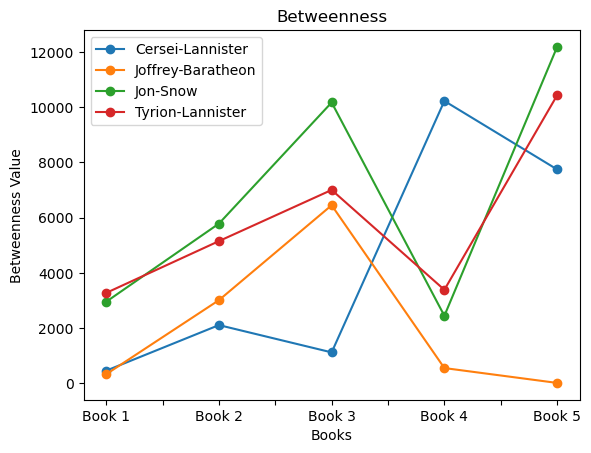

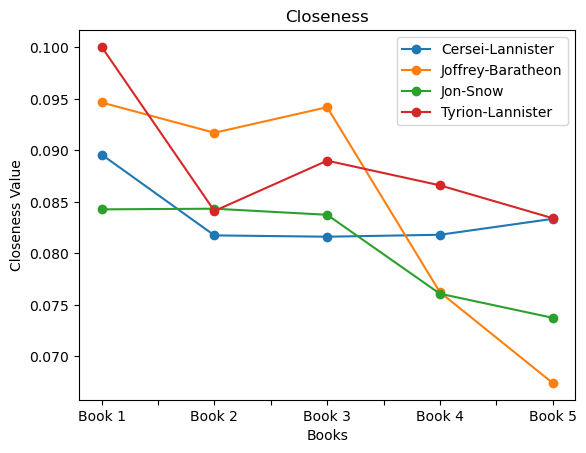

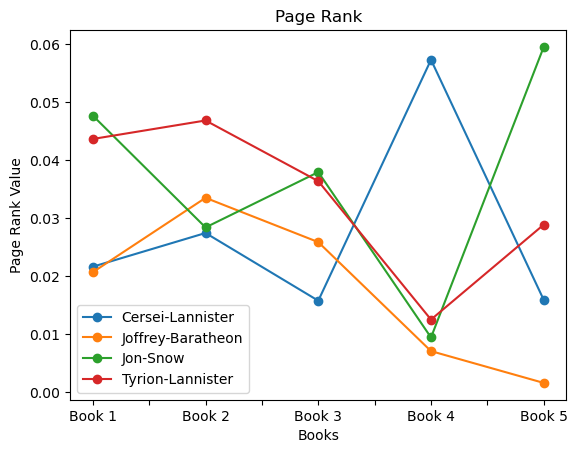

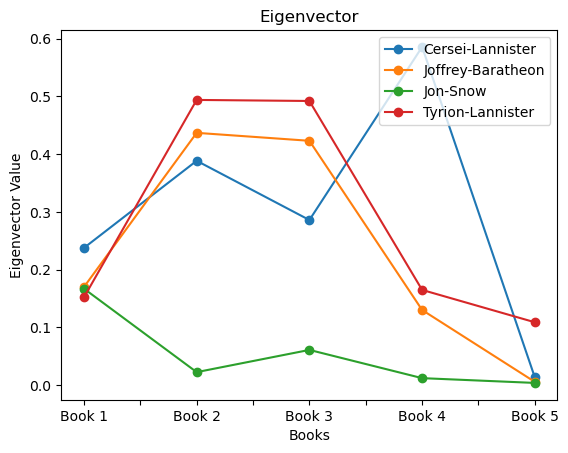

In [216]:
# Plot centrality measures for comparison
for centrality in ['Degree', 'Weighted Degree', 'Betweenness', 'Closeness', 'Page Rank', 'Eigenvector']:
    comparison_df[centrality].unstack('Character').plot(kind='line', marker='o', title=centrality)
    plt.ylabel(f"{centrality} Value")
    plt.xlabel("Books")
    plt.legend(loc="best")
    plt.show()

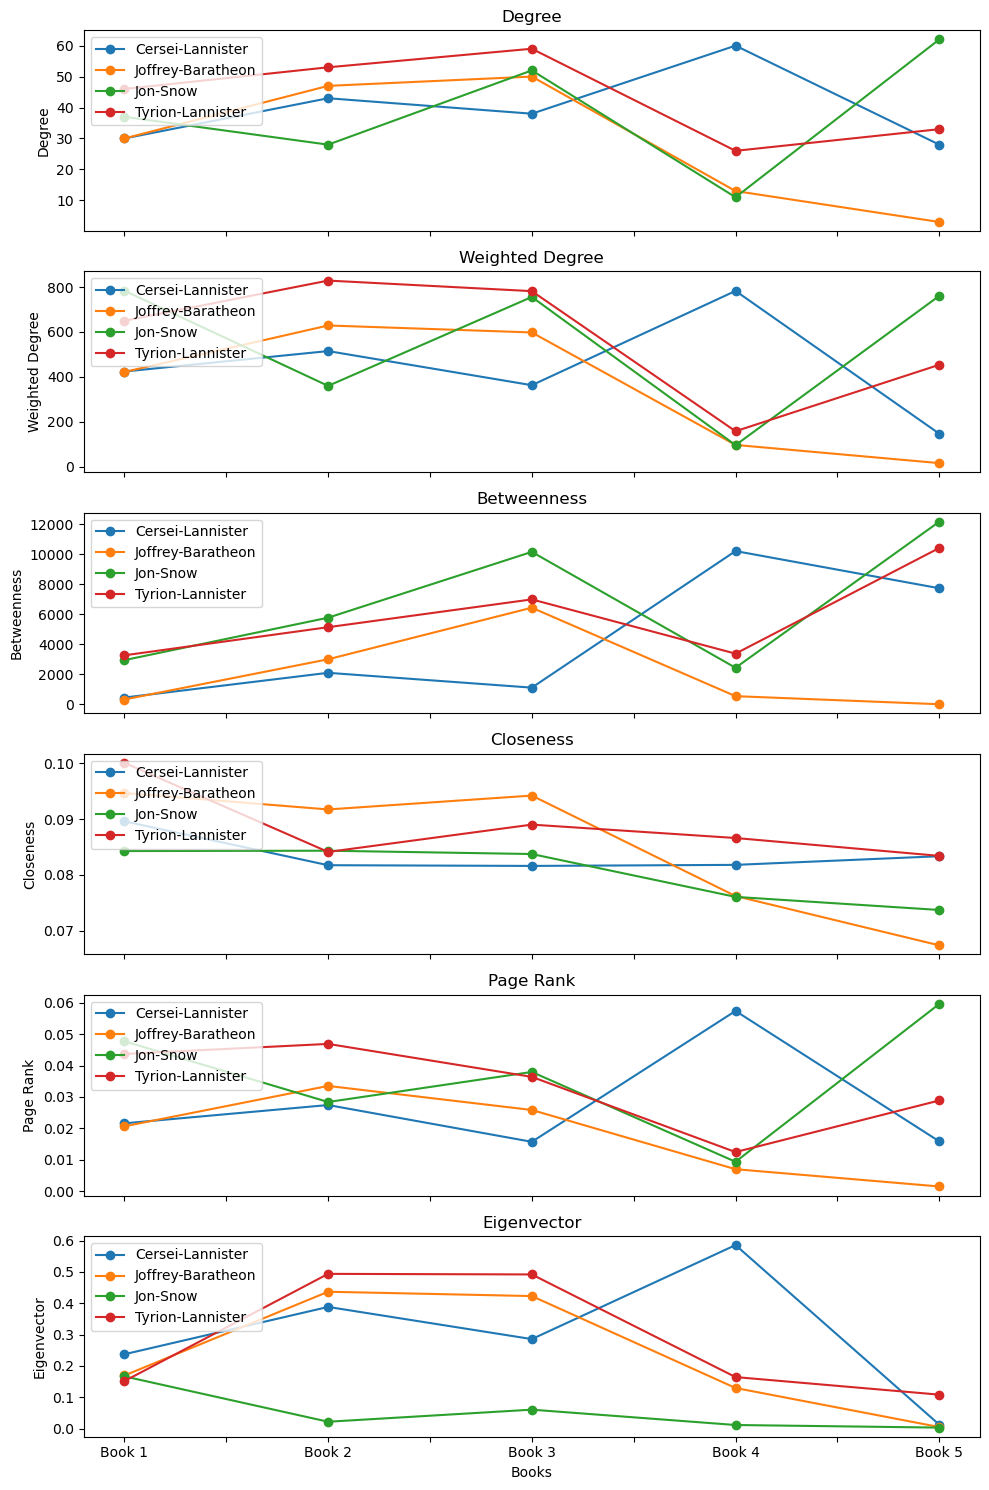

In [217]:
import matplotlib.pyplot as plt

# Create subplots for each centrality measure
centralities = ['Degree', 'Weighted Degree', 'Betweenness', 'Closeness', 'Page Rank', 'Eigenvector']
fig, axes = plt.subplots(len(centralities), 1, figsize=(10, 15), sharex=True)

for i, centrality in enumerate(centralities):
    comparison_df[centrality].unstack('Character').plot(ax=axes[i], marker='o', title=centrality)
    axes[i].set_ylabel(centrality)
    axes[i].legend(loc="upper left")

plt.xlabel("Books")
plt.tight_layout()
plt.show()

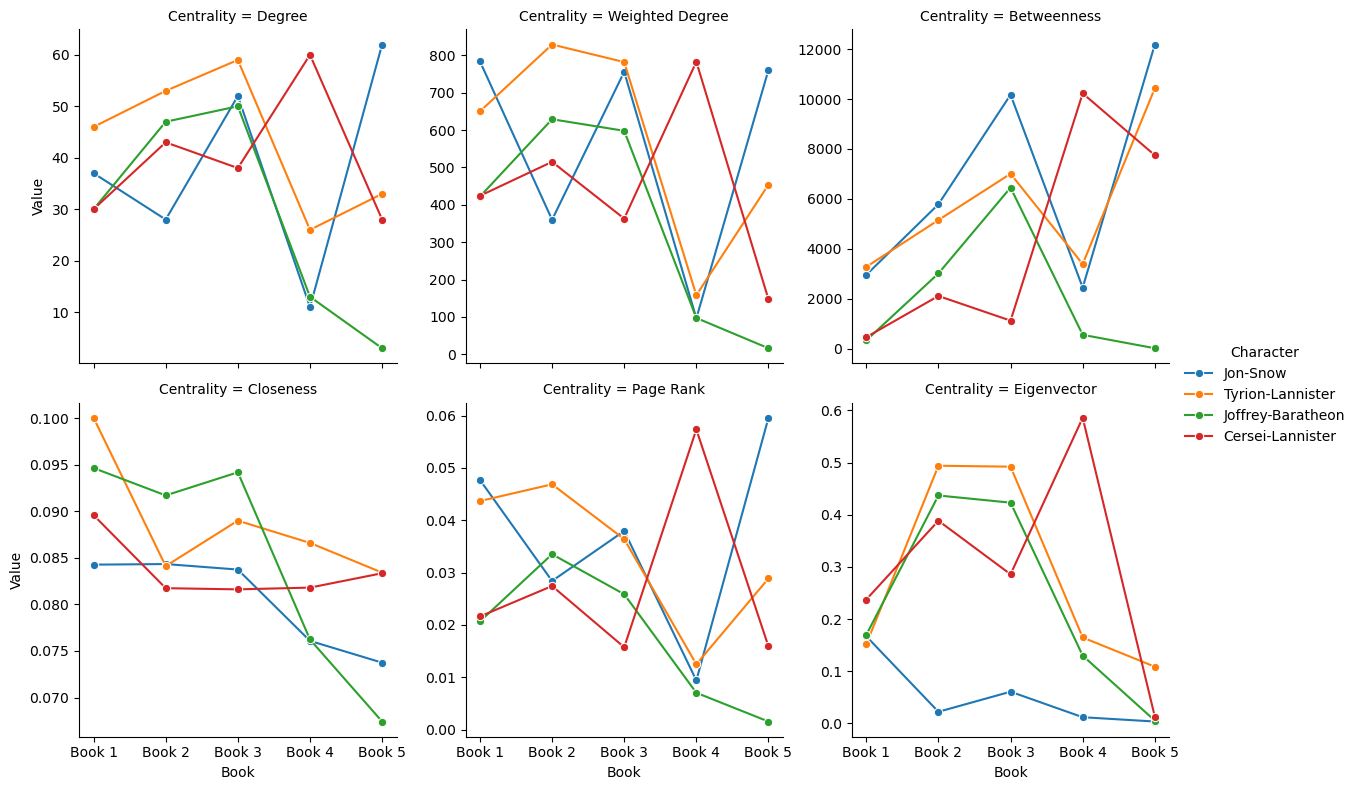

In [219]:
import seaborn as sns

# Reset index for Seaborn compatibility
plot_df = comparison_df.reset_index()

# Melt the DataFrame for faceted plotting
melted_df = plot_df.melt(id_vars=['Book', 'Character'], var_name='Centrality', value_name='Value')

# Create a faceted grid
g = sns.FacetGrid(melted_df, col="Centrality", hue="Character", col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, 'Book', 'Value', marker='o')
g.add_legend()
plt.show()

In [221]:
# Display the table directly in the console
#print(comparison_stats)

In [222]:
# Display the DataFrame in a readable table format
from IPython.display import display
display(comparison_stats)

,Degree max,Degree min,Weighted Degree max,Weighted Degree min,Betweenness max,Betweenness min,Closeness max,Closeness min,Page Rank max,Page Rank min,Eigenvector max,Eigenvector min
Character,,,,,,,,,,,,
Cersei-Lannister,60.0,28.0,783.0,147.0,10228.026073,454.808634,0.089595,0.081622,0.057348,0.015746,0.585855,0.012874
Joffrey-Baratheon,50.0,3.0,629.0,16.0,6449.081988,10.713045,0.094656,0.067421,0.033514,0.001551,0.436922,0.005196
Jon-Snow,62.0,11.0,784.0,96.0,12186.121627,2443.147449,0.084341,0.073746,0.059572,0.009401,0.166858,0.003428
Tyrion-Lannister,59.0,26.0,829.0,158.0,10432.594879,3272.606016,0.100054,0.083421,0.046869,0.012489,0.493969,0.108561


In [223]:
# Calculate the character with the highest value for each centrality measure
highest_stats = (
    comparison_df[["Degree", "Weighted Degree", "Betweenness", "Closeness", "Page Rank", "Eigenvector"]]
    .idxmax(axis=0)  # Find the character with the maximum value for each measure
    .to_frame(name="Character with Highest Value")  # Convert to DataFrame
)

# Add the corresponding highest values
highest_stats["Highest Value"] = comparison_df[
    ["Degree", "Weighted Degree", "Betweenness", "Closeness", "Page Rank", "Eigenvector"]
].max(axis=0).values

# Display the table
from IPython.display import display
display(highest_stats)


,Character with Highest Value,Highest Value
Degree,"(Book 5, Jon-Snow)",62.000000
Weighted Degree,"(Book 2, Tyrion-Lannister)",829.000000
Betweenness,"(Book 5, Jon-Snow)",12186.121627
Closeness,"(Book 1, Tyrion-Lannister)",0.100054
Page Rank,"(Book 5, Jon-Snow)",0.059572
Eigenvector,"(Book 4, Cersei-Lannister)",0.585855


Select your two favourite and your two least favourite characters in the series. Analyse and compare their centrality measures throughout the five books.

Jon Snow is the most influential character in book 5 with highest degree, betweenness and PageRank. 
Highest degree showing he interacts with several characters.
PageRank reflects his influence across the network.

Tyrion has a peak influence in books 1 and 2 with closeness and weighted degree which make him relevant for the network.
Highest weighted degree in book 2 showing his interactions with key characters.
Has the highest closeness in book 1 indicating his ability to connect with others.

Cersei Lannister reaches peak connectedness in Book 4, as reflected by her Eigenvector score.
shows her influence with other characters.


How do their centralities relate to their role in the series development?

Jon Snow
High Degree in Book 5: Indicates his interactions with the most characters, reflecting his leadership role as he unites factions like the Night’s Watch, Wildlings, and later other northern houses.
High Betweenness Book 5: Shows Jon is a critical bridge, connecting otherwise disconnected groups in the story. His decisions significantly influence the alliances and survival of key factions.
High PageRank Book 5: Highlights his  influence across the network, as his actions have effects on other characters and events.
Narrative Role: Jon’s centralities in Book 5 mirror his rise as a unifying leader and a key decision-maker in the battle against the White Walkers and Cersei Lannister

Tyrion Lannister
High Weighted Degree Book 2: Reflects his involvement in critical interactions during his time as Hand of the King, managing King’s Landing and forging alliances during the War of the Five Kings.
High Closeness Book 1: Indicates Tyrion’s ability to quickly connect with key characters. Early in the series, he interacts with a wide variety of people (Starks, Catelyn, Lannisters, the Night’s Watch), establishing his role as a mediator and strategist.
Narrative Role: Tyrion’s high centralities reflect his pivotal role in navigating political conflicts and surviving through wit, especially in the early and mid-series.

Cersei Lannister
High Eigenvector Book 4: Suggests she is deeply connected to other influential figures, reflecting her consolidation of power as Queen Regent. Her influence is derived from her control over key characters and resources, despite being isolated in other ways.
Narrative Role: Cersei’s peak centrality in Book 4 corresponds to her rise as the dominant political force in King’s Landing after Tywin’s death, using her cunning and alliances to secure power.

Joffrey Baratheon
Low Centralities in Book 5: Reflect his death in Book 3 and his complete removal from the network.
Moderate Betweenness and Weighted Degree Books 2 and 3: Show his influence during his reign as king, particularly through his direct and indirect interactions with major players.
Narrative Role: Joffrey’s centrality declines after his death, but during his reign, he was a catalyst for conflict, reflected by his moderate centrality measures.



#Your answer

#### **Part 3: Community detection**

Select your favourite book and implement the three community detection algoritms covered in the lecture. 

In [224]:
## Your code

# Girvan Newman
partitions = list(nx.community.girvan_newman(GoT_1))
print(f'The list contains {len(partitions)} partitions')

partition_greedy_modularity = nx.community.greedy_modularity_communities(GoT_1) #Finds the best partition based on Newman's greedy algorithm
print(partition_greedy_modularity)
print(f'The partition contains GM {len(partition_greedy_modularity)} communities')

# Louvain
partition_louvain = nx.community.louvain_communities(GoT_1) #Finds the best partition of a graph using the Louvain community detection algorithm. 
print(partition_louvain)
print(f'The partition contains PL {len(partition_louvain)} communities')


#Label propagation
partition_LP = list(nx.community.asyn_lpa_communities(GoT_1))
print(partition_LP)
print(f'The partition contains PLP {len(partition_LP)} communities')

The list contains 186 partitions
[frozenset({'Willis-Wode', 'Jonos-Bracken', 'Moreo-Tumitis', 'Donnel-Waynwood', 'Hali', 'Walder-Frey', 'Kevan-Lannister', 'Tyrion-Lannister', 'Wendel-Manderly', 'Luwin', 'Masha-Heddle', 'Stevron-Frey', 'Osha', 'Brynden-Tully', 'Edmure-Tully', 'Nan', 'Harys-Swyft', 'Catelyn-Stark', 'Rickon-Stark', 'Theon-Greyjoy', 'Mya-Stone', 'Jory-Cassel', 'Kurleket', 'Nestor-Royce', 'Jaime-Lannister', 'Lyn-Corbray', 'Robert-Arryn', 'Mychel-Redfort', 'Hallis-Mollen', 'Marillion', 'Gunthor-son-of-Gurn', 'Maege-Mormont', 'Rodrik-Cassel', 'Addam-Marbrand', 'Robb-Stark', 'Eon-Hunter', 'Galbart-Glover', 'Tytos-Blackwood', 'Rickard-Karstark', 'Jyck', 'Jon-Umber-(Greatjon)', 'Joseth', 'Stiv', 'Hodor', 'Chiggen', 'Vardis-Egen', 'Lysa-Arryn', 'Tywin-Lannister', 'Roose-Bolton', 'Leo-Lefford', 'Bran-Stark', 'Wyl-(guard)', 'Morrec', 'Chella', 'Bronn', 'Mord', 'Heward', 'Colemon', 'Hoster-Tully', 'Hullen', 'Shae'}), frozenset({'Petyr-Baelish', 'Arya-Stark', 'Thoros-of-Myr', 'Barris

How many communities are identified by each algorithm?

Plot three networks colouring the nodes based on the communitity the characters were assigned to by each algorithm. <br> *Hint: you can make some modifications to make the plots to look better*

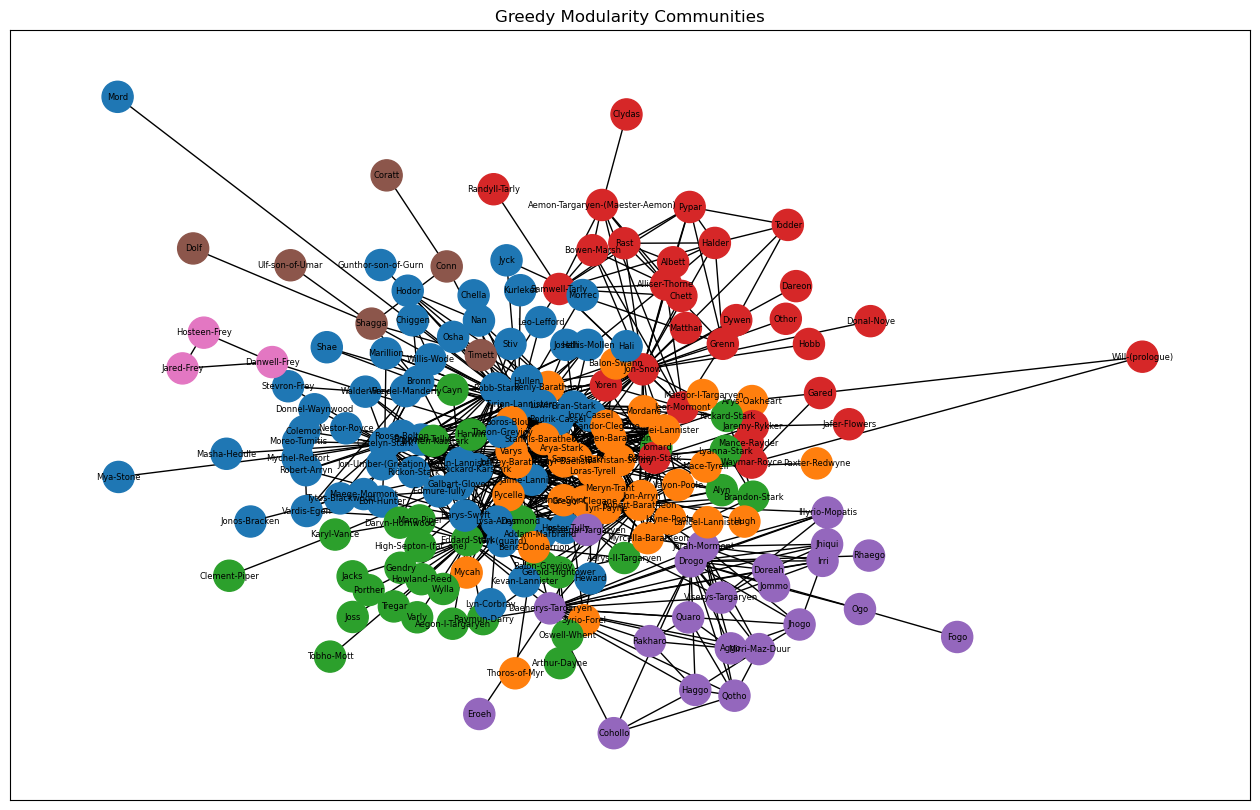

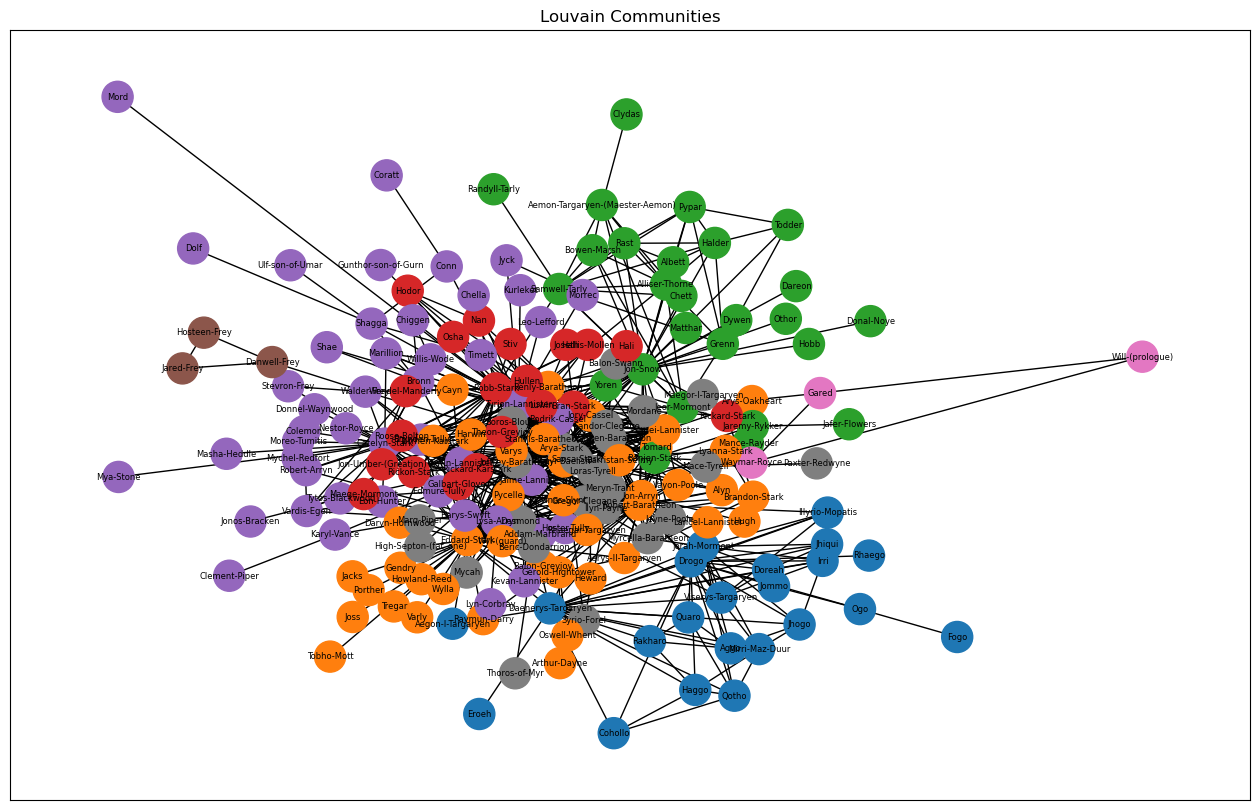

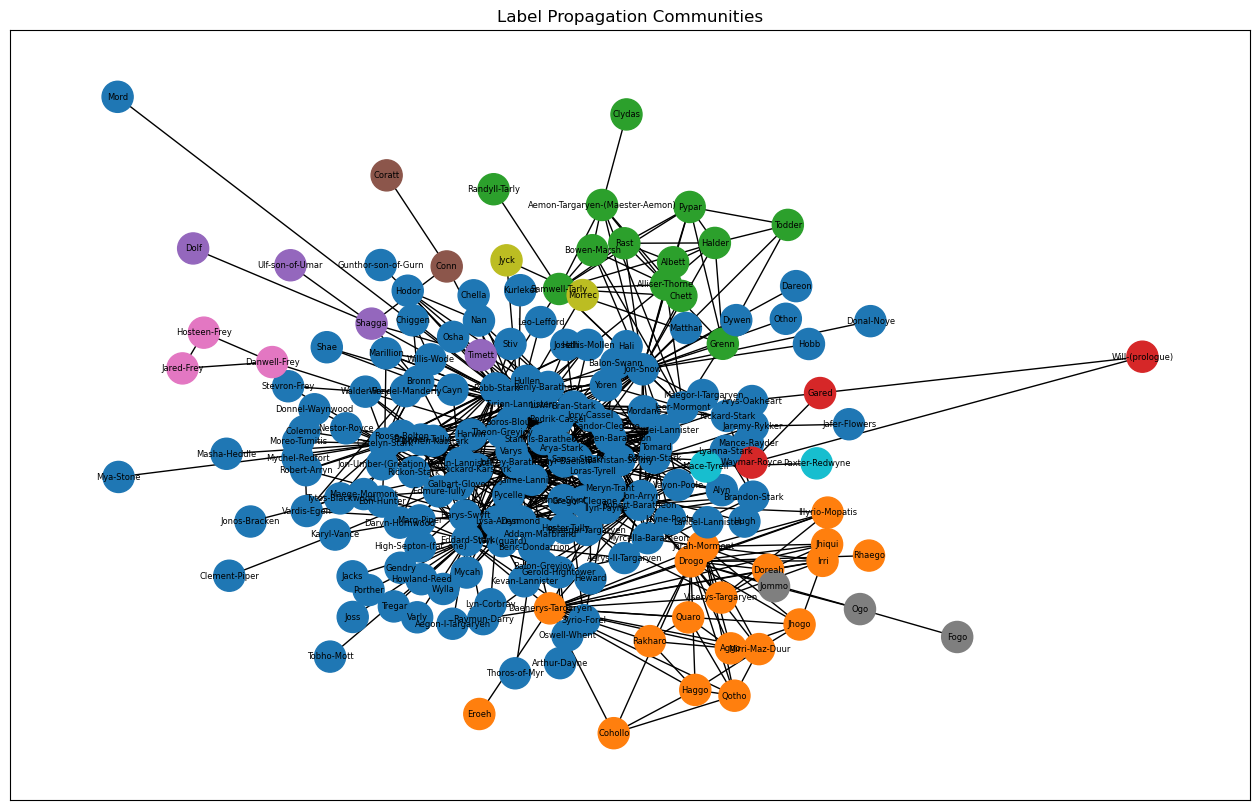

In [197]:
# Your code

#pos = nx.spring_layout(GoT_1, iterations=20, k=4)
pos = nx.kamada_kawai_layout(GoT_1)

def plot_community_network(G, labels, title):
    """
    Plots a network with nodes colored based on community labels.

    Parameters:
        G: NetworkX graph
        labels: Dictionary of node-to-community mappings
        title: Title of the plot
    """
    # Generate a spring layout for node positions
    
    
    # Convert community labels to a list of colors
    communities = list(labels.values())
    unique_communities = sorted(set(communities))
    color_map = {community: plt.cm.tab10(i % 10) for i, community in enumerate(unique_communities)}
    node_colors = [color_map[labels[node]] for node in G.nodes()]

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(16, 10))
    
    # Plot nodes
    nx.draw_networkx_nodes(G, pos=pos, node_size=500, node_color=node_colors)
    
    # Add node labels
    nx.draw_networkx_labels(G, pos=pos, font_size=6)
    
    # Draw weighted edges
    #weights = [d for (u, v, d) in G.edges(data='weight')]
    #alpha_values = [d / max(weights) for (u, v, d) in G.edges(data='weight')]
    nx.draw_networkx_edges(G, pos=pos)#, width=np.log(weights), alpha=alpha_values)
    
    # Add title and show the plot
    ax.set_title(title)
    plt.show()


# Plot networks for each community detection algorithm
plot_community_network(GoT_1, greedy_labels, "Greedy Modularity Communities")
plot_community_network(GoT_1, louvain_labels, "Louvain Communities")
plot_community_network(GoT_1, LP_labels, "Label Propagation Communities")


Compare the communities identified by each algorithm. Which one has the highest modularity? How similar or different are they?

In [198]:
#Your code
print(nx.community.quality.modularity(GoT_1,partition_greedy_modularity))

print(nx.community.quality.modularity(GoT_1,partition_louvain))

print(nx.community.quality.modularity(GoT_1,partition_LP))

0.43517968129872053
0.5110819416050247
0.23581842080449916


Lovain (0.511) has the best modularity finding the strongest community structure.
Greedy (0.435) nos strong as Louvan due its local focusing.
Label Propagation (0.236) Weakest, the network could be fragmented or overlaping.

In [199]:
#Compare
greedy_labels = {}
louvain_labels = {}
LP_labels = {}

for community_index, community in enumerate(partition_greedy_modularity):
    for node in community:
        greedy_labels[node] = community_index

for community_index, community in enumerate(partition_louvain):
    for node in community:
        louvain_labels[node] = community_index

for community_index, community in enumerate(partition_LP):
    for node in community:
        LP_labels[node] = community_index

In [200]:
# Combine the dictionaries into a DataFrame
community_df = pd.DataFrame({
    "Greedy": greedy_labels,
    "Louvain": louvain_labels,
    "Label Propagation": LP_labels
})

# Set the node names as the index
community_df.index.name = "Node"


The normalized mutual infor score measures how simiar communities are.
1= 2 community structures are identical
0= no overlap between the community structures.
Modularity measures how well a network is divided into groups

In [201]:
metrics.normalized_mutual_info_score(community_df['Greedy'], community_df['Louvain'])

0.7167222918452597

Greedy vs Louvain
Both algorithms find similar communities focusing in grouping nodes to maximize modularity
0.716 Fairly similarity communities with some overlap.

In [202]:
metrics.normalized_mutual_info_score(community_df['Greedy'], community_df['Label Propagation'])

0.5381363364487564

In [203]:
metrics.normalized_mutual_info_score(community_df['Louvain'], community_df['Label Propagation'])

0.5329421498369241

Label Propagation vs Greedy or Louvain
Label propagation finid different communities without focusing on modularity leading to less structured groups.

0.538 Kind of similar with less overlap than the previous one.
0.532 Similiar to the previous with similarities and overlap. 

#Your answer
Louvanin and Greedy find similar well defined groups.
Label propagation finds less clear unique groups.